This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

# Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load and review the data

In [2]:
df=pd.read_csv('pima-indians-diabetes-2.csv')

In [3]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

Class is the output variable, which tells whether a person is diabetic or not

In [5]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Check for missing values

In [6]:
# Check for null values
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [7]:
#There are no null values
#Check if missing values are given in '?' or other string format
df.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [8]:
#Check if missing values are indicated by out of range entries i.e. '-1' or something like that
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Here '0' mass does not mean anything and is out of range entry
# Same goes for all columns other than class
df1=df.drop(['class'],axis=1)
df1

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
#Replace 0 with NaN
df1 = df1.replace(0,np.nan)

In [11]:
df1.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33


In [12]:
#Fill missing values with median
df1.fillna(df1.median(),inplace=True)

In [13]:
#Add class column to df1
df1['class']=df['class']

In [14]:
df1.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [15]:
df=df1

# Visualize the data

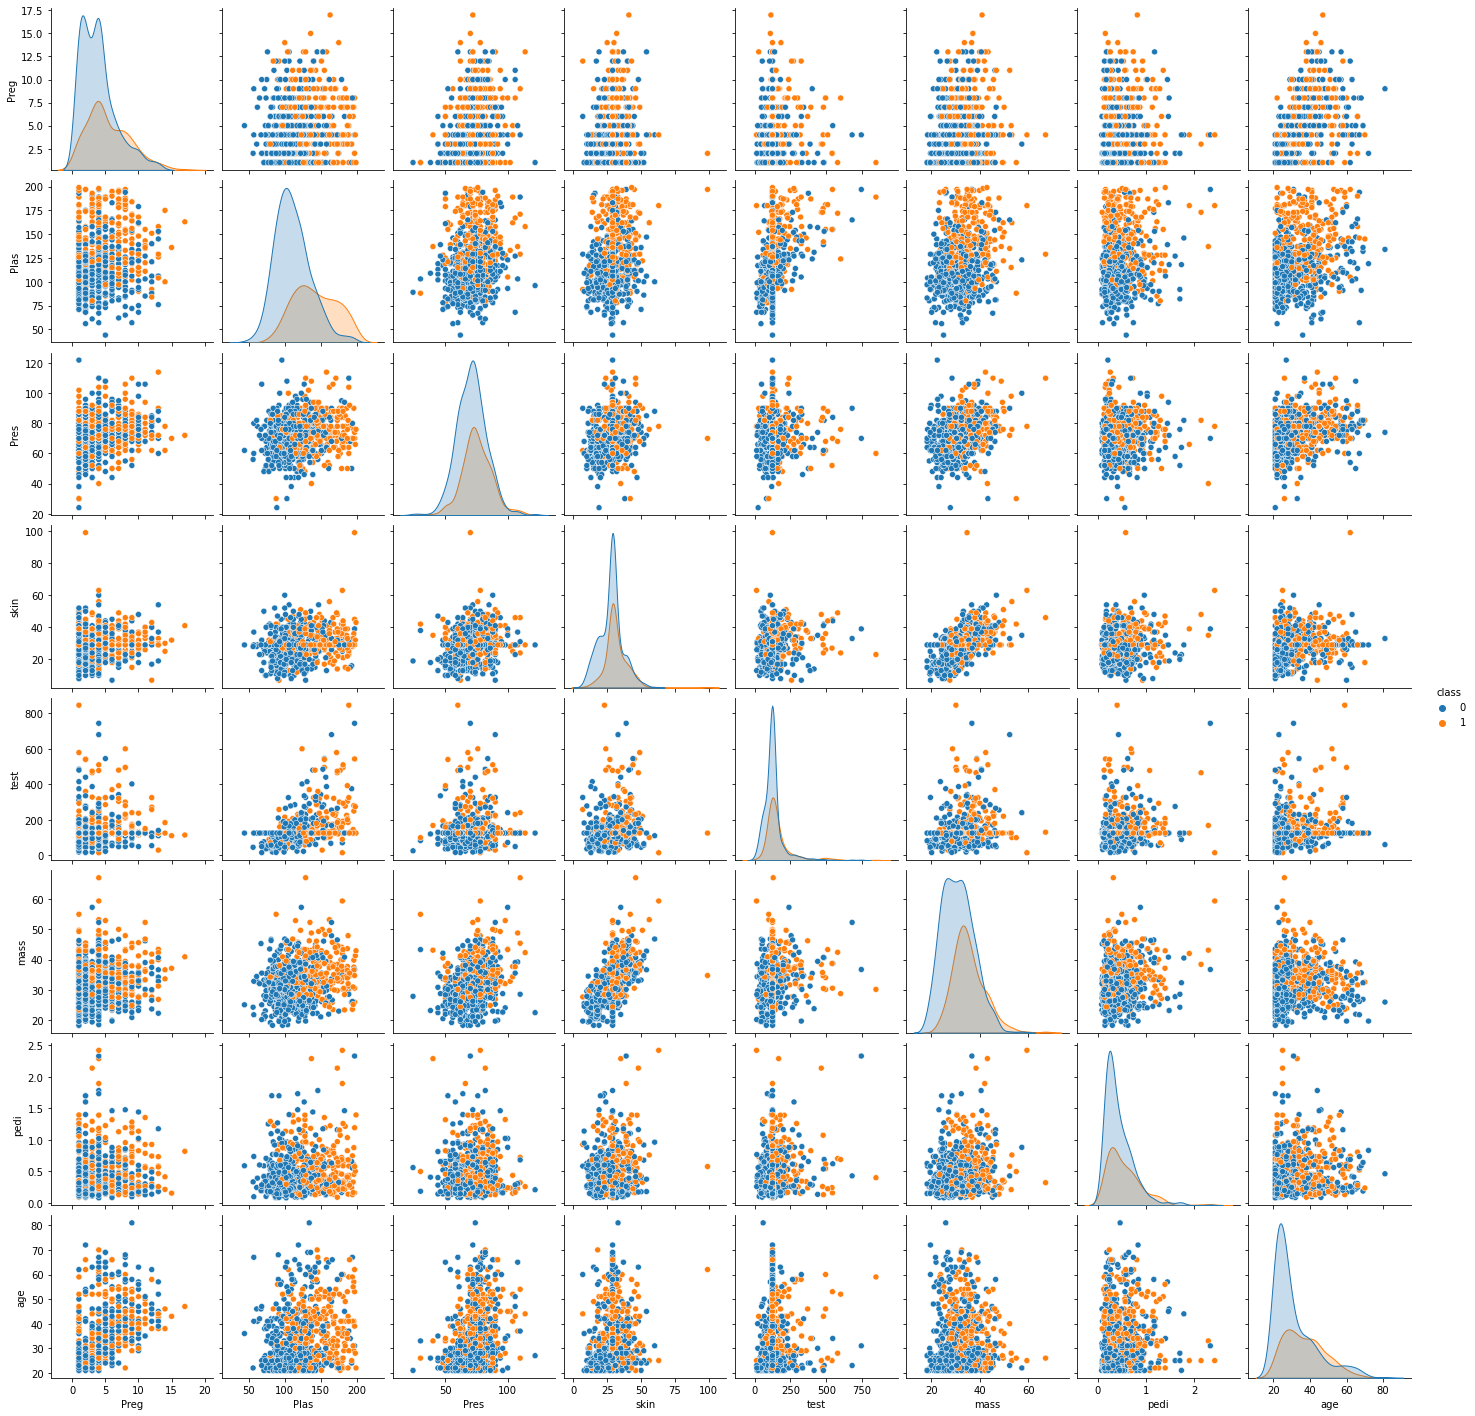

In [16]:
sns.pairplot(df,diag_kind='kde',hue='class')

# Find correlation in data

In [17]:
#Correlation matrix
corr=df.corr()
corr

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.153525,0.255967,0.126082,0.032397,0.100870,-0.009198,0.522303,0.248172
Plas,0.153525,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
Pres,0.255967,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
skin,0.126082,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
test,0.032397,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
mass,0.100870,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
pedi,-0.009198,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
age,0.522303,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
class,0.248172,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<AxesSubplot:>

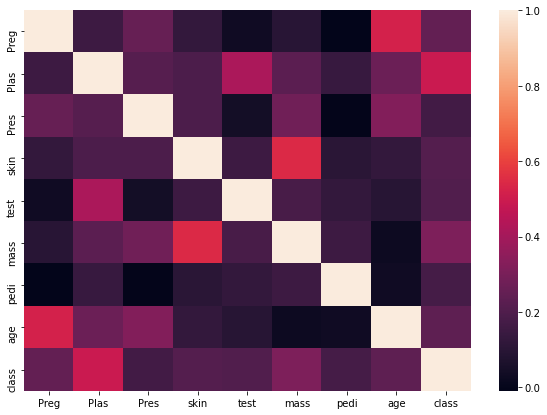

In [18]:
#For Graphical representation of correlation matrix
plt.figure(figsize=(10,7))
sns.heatmap(corr)

In the above figure we can see that no two variables are highly correlated with each other

## As we are doing logistic regression we check if the data is balanced or not

<AxesSubplot:xlabel='class', ylabel='count'>

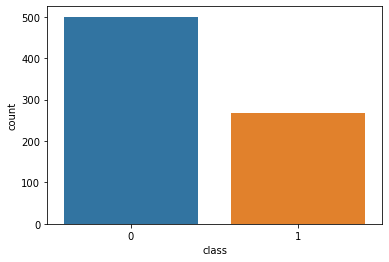

In [19]:
sns.countplot(x='class',data=df)

In [20]:
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

### The data is balanced here 

# Split the data 

In [21]:
x=df.drop(columns=['class'],axis=1)
y=df[['class']]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [23]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15.0,136.0,70.0,32.0,110.0,37.1,0.153,43
467,4.0,97.0,64.0,36.0,100.0,36.8,0.600,25
550,1.0,116.0,70.0,28.0,125.0,27.4,0.204,21
147,2.0,106.0,64.0,35.0,119.0,30.5,1.400,34
481,4.0,123.0,88.0,37.0,125.0,35.2,0.197,29


# Perform Logistic Regression

In [24]:
reg=LogisticRegression()

In [25]:
reg.fit(x_train,y_train)

C:\Users\kshit\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\kshit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Accuracy of the model

In [26]:
y_pred=reg.predict(x_test)

In [27]:
reg.score(x_train,y_train)

0.7728119180633147

In [28]:
reg.score(x_test,y_test)

0.7878787878787878

In [29]:
reg.intercept_

array([-8.4375278])

In [30]:
reg.coef_

array([[ 0.1188278 ,  0.0335736 , -0.01660565, -0.0055419 , -0.00061859,
         0.10659618,  0.55401645,  0.02071734]])

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
y_pred=reg.predict(x_test)

In [33]:
cm=confusion_matrix(y_test,y_pred,labels=[1,0])
cm

array([[ 51,  34],
       [ 15, 131]], dtype=int64)

<AxesSubplot:>

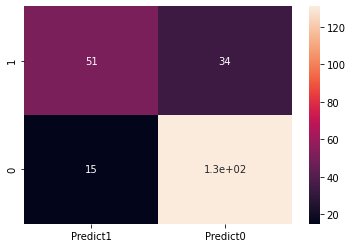

In [34]:
#Graphical representation of the Confusion matrix
df_cm=pd.DataFrame(cm,index=[i for i in [1,0]] ,columns=[i for i in ['Predict1','Predict0']])
sns.heatmap(df_cm,annot=True)

50 True positives: We predicted they have Diabetes and they actually have Diabetes    
131 True negatives: We predicted they do not have Diabetes and they actually do not have Diabetes  
35 False negatives: We made a false prediction that they do not have Diabetes.  
15 False positives: We made a false prediction that they have Diabetes.